# Census-Income problem statement
### https://archive.ics.uci.edu/dataset/20/census+income

###### In this dataset, initially you need to pre-process the data and then develop an understanding of different features. Preform exploratory analysis and visualizations.

###### Further having good knowledge about data you will perform predective classification to predict whether an individual makes over 50K per year or less, by using different ML algorithms.
---



In [1]:
#add column names explicitly as data set don't contains the column names
col = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status","occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [2]:
col

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data pre-processing section

In [4]:
data_org = pd.read_csv("adult.csv", names=col, na_values='?',skipinitialspace=True)

In [5]:
data_org.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data_test = pd.read_csv("adult-test.csv", names=col, na_values='?',skipinitialspace=True)

In [8]:
#drop index 0 from original test csv file
data_test.drop([0], inplace=True)

In [9]:
#converting age column from object dtype to INT for test data
data_test = data_test.astype({"age":"int"})

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  int64  
 1   workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      15315 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16007 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


In [11]:
data_org.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [12]:
data_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [13]:
data_org.dropna(inplace=True)

In [14]:
data_org.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
data_test.dropna(inplace=True)

In [16]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             15060 non-null  int64  
 1   workclass       15060 non-null  object 
 2   fnlwgt          15060 non-null  float64
 3   education       15060 non-null  object 
 4   education-num   15060 non-null  float64
 5   marital-status  15060 non-null  object 
 6   occupation      15060 non-null  object 
 7   relationship    15060 non-null  object 
 8   race            15060 non-null  object 
 9   sex             15060 non-null  object 
 10  capital-gain    15060 non-null  float64
 11  capital-loss    15060 non-null  float64
 12  hours-per-week  15060 non-null  float64
 13  native-country  15060 non-null  object 
 14  income          15060 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.8+ MB


### Data manipulation section

##### as per the requirement the ask is to use dplyr package but the same can be leverage with python dataframe.

In [17]:
census_ed = data_org["education"]

In [18]:
#Extract column with Iloc
census_seq = data_org.iloc[:,0:8]

In [19]:
census_col = data_org.iloc[:,[5, 8, 11]]

In [20]:
male_gov = data_org[(data_org['sex'] == "Male") & (data_org['workclass'] == "State-gov")]

In [21]:
census_us = data_org[(data_org['age'] == 39) & ((data_org['education'] == "Bachelors") | (data_org["native-country"] == "Unites-States"))]

In [22]:
census_200 = data_org.sample(n = 200)

In [23]:
avg_capital_gain = data_org.groupby("workclass")["capital-gain"].mean()

In [24]:
avg_capital_gain

workclass
Federal-gov          832.321315
Local-gov            829.230285
Private              879.858207
Self-emp-inc        4810.746741
Self-emp-not-inc    1913.134454
State-gov            684.306489
Without-pay          487.857143
Name: capital-gain, dtype: float64

### Data visualization section

In [25]:
df_temp1 = data_org.loc[:,{"relationship","sex"}]

In [26]:
df2 = pd.DataFrame()
df2["relationship"] = df_temp1["relationship"].unique()
df2

,relationship
0,Not-in-family
1,Husband
2,Wife
3,Own-child
4,Unmarried
5,Other-relative


In [27]:
arr_male = []
arr_female = []
for i in df2["relationship"]:
  arr_male.append(df_temp1[(df_temp1["relationship"] == i) & (df_temp1["sex"] == "Male")].value_counts()[0])
  arr_female.append(df_temp1[(df_temp1["relationship"] == i) & (df_temp1["sex"] == "Female")].value_counts()[0])
df2["male"] = arr_male
df2["female"] = arr_female

<Axes: title={'center': 'Distribution of relationship by sex'}, xlabel='Categories of Relationship', ylabel='Count of categories'>

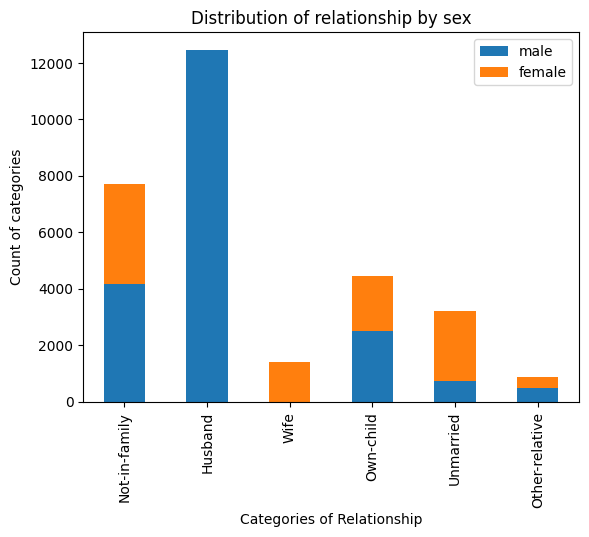

In [28]:
df2.plot(x="relationship",kind="bar", stacked = True, title="Distribution of relationship by sex", xlabel = "Categories of Relationship", ylabel = "Count of categories")

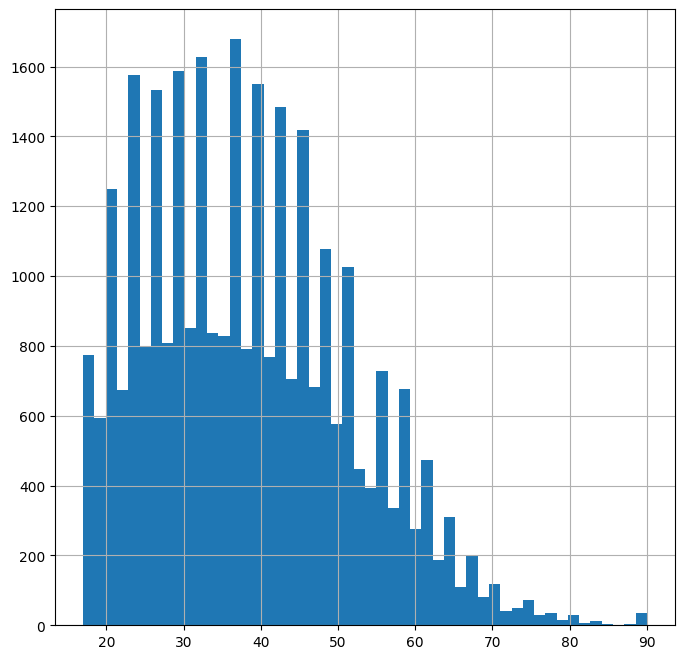

In [29]:
data_org["age"].hist(figsize=(8,8), bins=50)
plt.show()

In [30]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


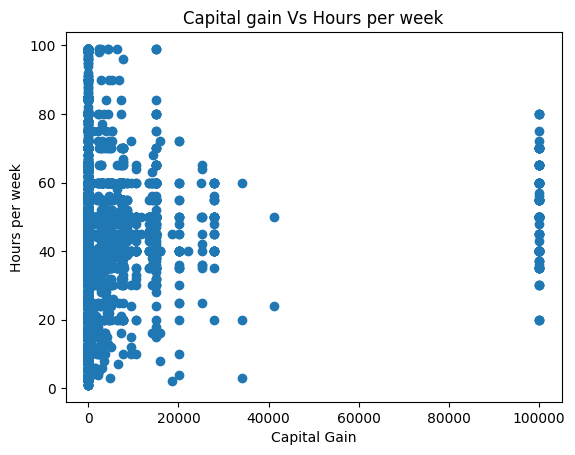

In [31]:
plt.scatter(data=data_org, x="capital-gain", y="hours-per-week")
plt.xlabel("Capital Gain")
plt.ylabel("Hours per week")
plt.title("Capital gain Vs Hours per week")
plt.show()

In [32]:
data_org["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

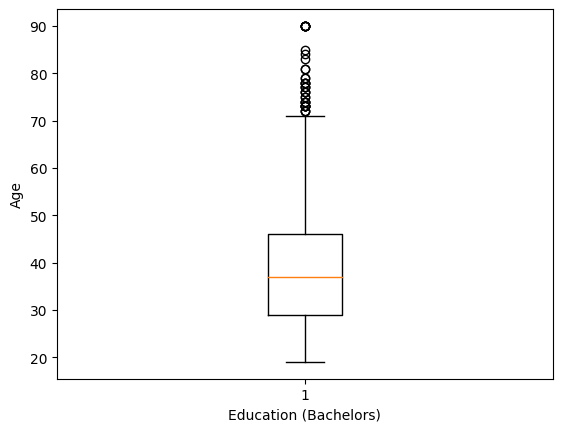

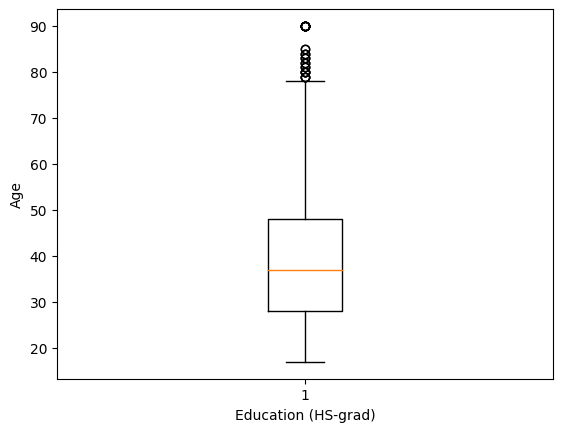

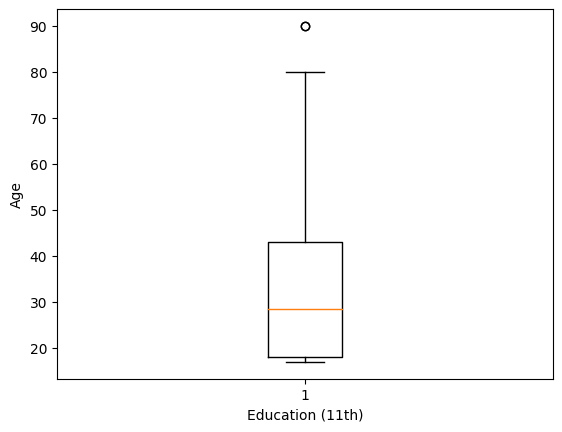

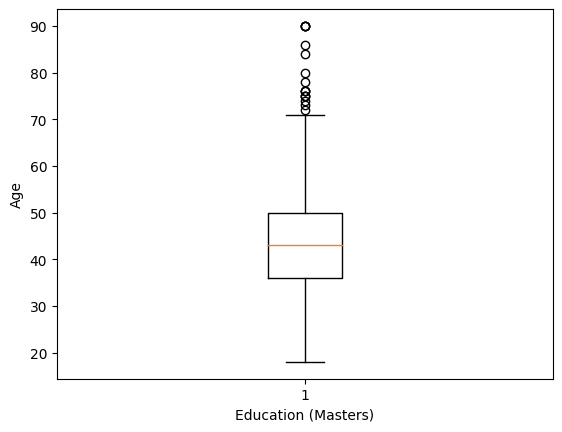

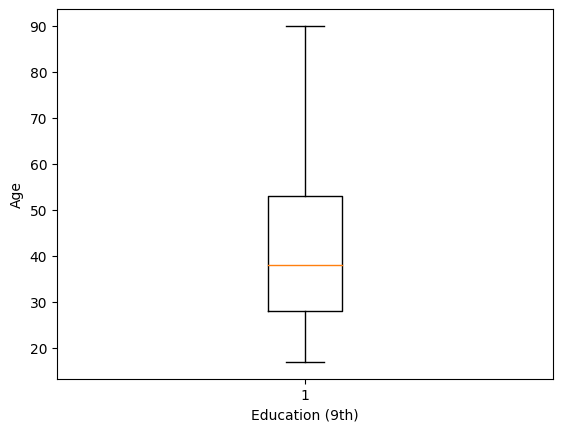

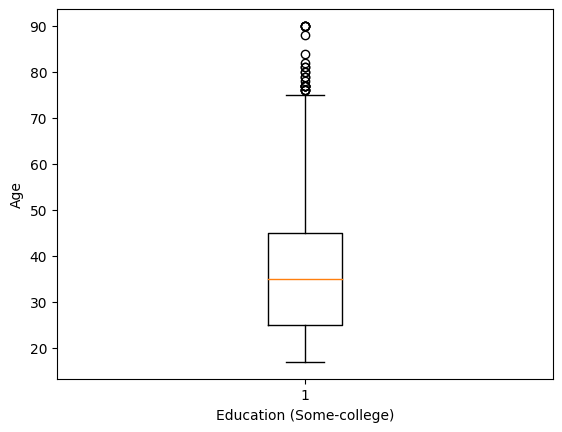

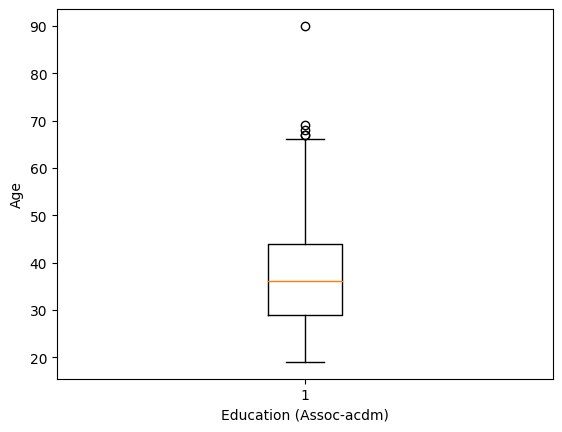

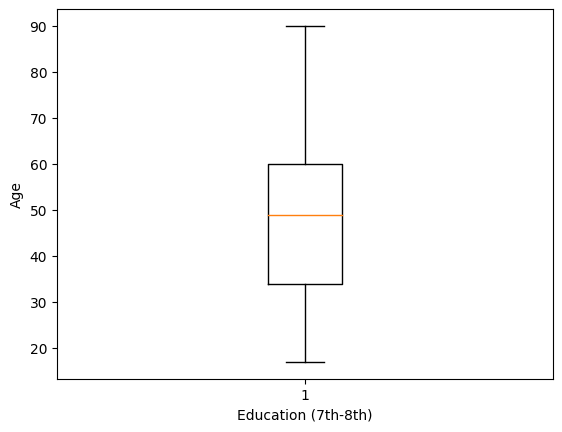

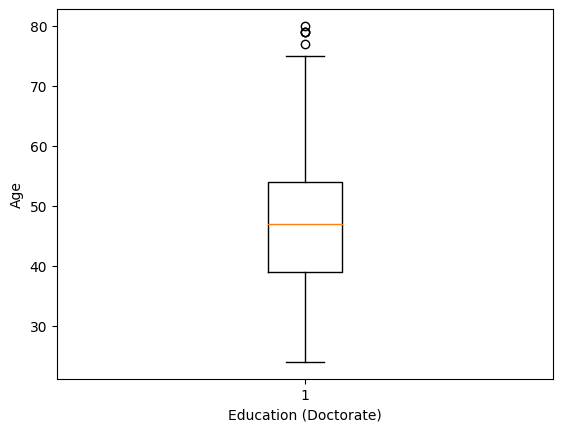

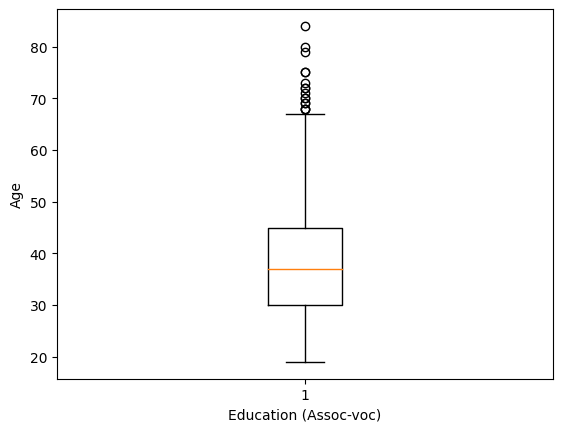

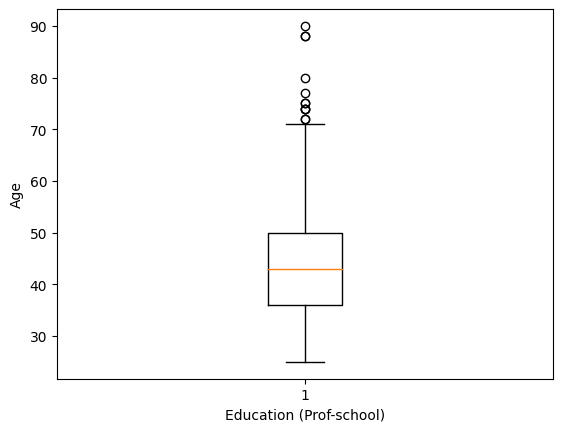

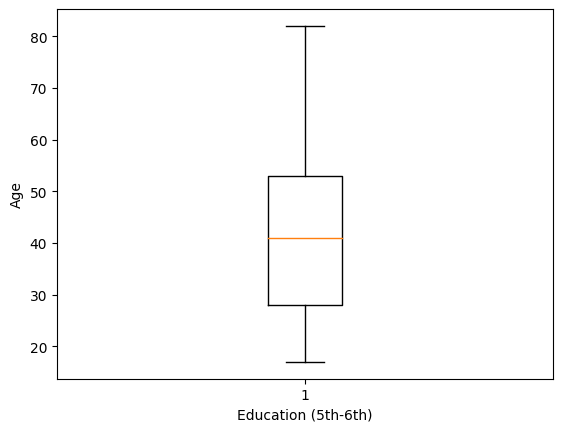

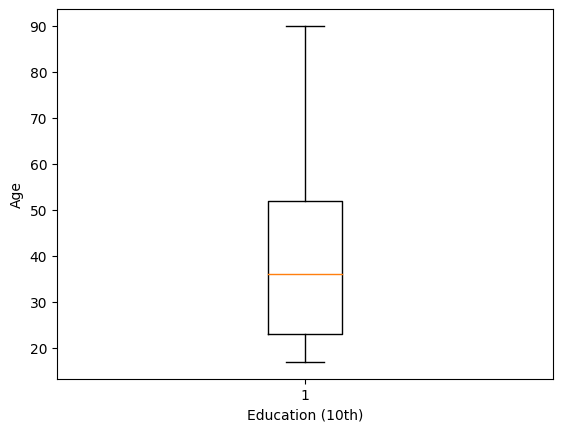

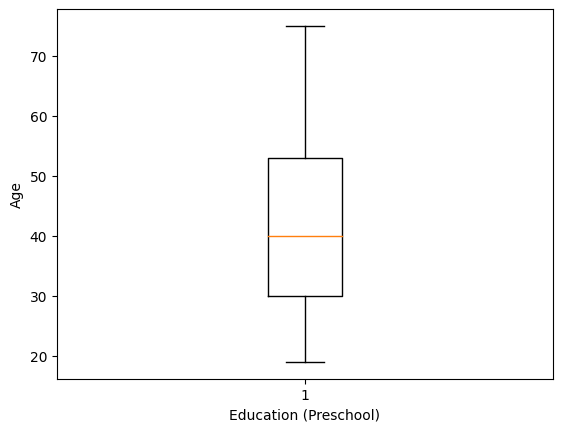

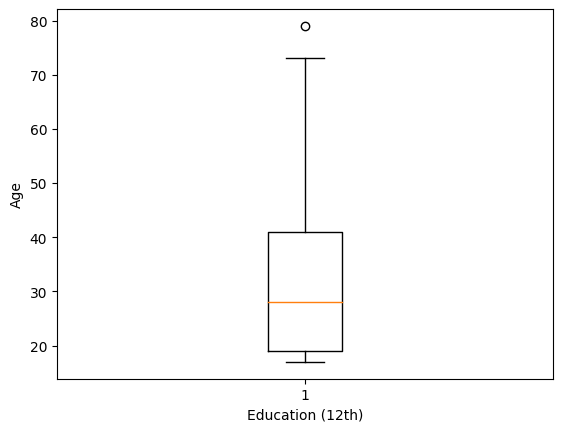

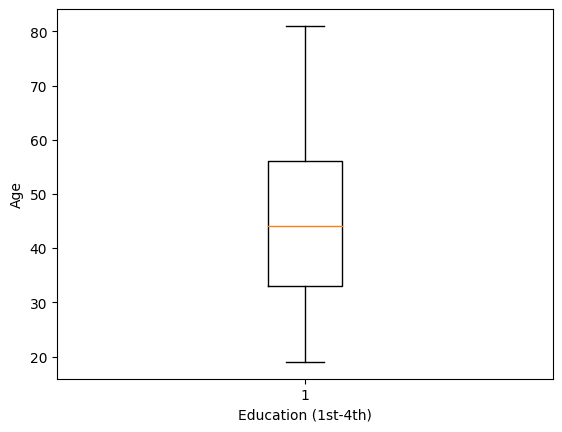

In [33]:
for i in data_org["education"].unique():
  plt.boxplot(data_org[data_org["education"] == i]["age"])
  plt.xlabel("Education ("+i+")")
  plt.ylabel("Age")
  plt.show()

### Linear Regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import*

In [36]:
df_linear = data_org[["education","hours-per-week"]]

In [37]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   education       30162 non-null  object
 1   hours-per-week  30162 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.9+ KB


In [74]:
df_linear.corr()

,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
hours-per-week,1.000000,-0.048375,-0.106704,-0.049150,-0.015121,-0.017479,-0.009162,-0.022358,0.003931,0.018172,0.075457,0.064632,0.006438,0.065970,-0.013115,0.079401,-0.067668
education_10th,-0.048375,1.000000,-0.031717,-0.018808,-0.011858,-0.016414,-0.022930,-0.020689,-0.031084,-0.035579,-0.074913,-0.018757,-0.116326,-0.039918,-0.006462,-0.022614,-0.089145
education_11th,-0.106704,-0.031717,1.000000,-0.021345,-0.013458,-0.018629,-0.026024,-0.023480,-0.035279,-0.040379,-0.085021,-0.021288,-0.132021,-0.045304,-0.007334,-0.025665,-0.101174
education_12th,-0.049150,-0.018808,-0.021345,1.000000,-0.007980,-0.011046,-0.015432,-0.013923,-0.020920,-0.023944,-0.050416,-0.012623,-0.078286,-0.026864,-0.004349,-0.015219,-0.059994
education_1st-4th,-0.015121,-0.011858,-0.013458,-0.007980,1.000000,-0.006965,-0.009730,-0.008779,-0.013190,-0.015096,-0.031787,-0.007959,-0.049359,-0.016938,-0.002742,-0.009595,-0.037826
education_5th-6th,-0.017479,-0.016414,-0.018629,-0.011046,-0.006965,1.000000,-0.013468,-0.012151,-0.018257,-0.020897,-0.043999,-0.011017,-0.068323,-0.023445,-0.003795,-0.013282,-0.052358
education_7th-8th,-0.009162,-0.022930,-0.026024,-0.015432,-0.009730,-0.013468,1.000000,-0.016975,-0.025505,-0.029193,-0.061467,-0.015390,-0.095446,-0.032753,-0.005302,-0.018555,-0.073145
education_9th,-0.022358,-0.020689,-0.023480,-0.013923,-0.008779,-0.012151,-0.016975,1.000000,-0.023012,-0.026339,-0.055459,-0.013886,-0.086117,-0.029552,-0.004784,-0.016741,-0.065995
education_Assoc-acdm,0.003931,-0.031084,-0.035279,-0.020920,-0.013190,-0.018257,-0.025505,-0.023012,1.000000,-0.039574,-0.083325,-0.020863,-0.129388,-0.044400,-0.007188,-0.025153,-0.099156
education_Assoc-voc,0.018172,-0.035579,-0.040379,-0.023944,-0.015096,-0.020897,-0.029193,-0.026339,-0.039574,1.000000,-0.095372,-0.023880,-0.148095,-0.050820,-0.008227,-0.028790,-0.113492


In [41]:
one_hot_encoded_data = pd.get_dummies(df_linear, columns = ["education"])

In [44]:
df_linear = one_hot_encoded_data

In [51]:
df_linear.head()

,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,13,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [48]:
X = df_linear.iloc[:,1:]

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   education_10th          30162 non-null  uint8
 1   education_11th          30162 non-null  uint8
 2   education_12th          30162 non-null  uint8
 3   education_1st-4th       30162 non-null  uint8
 4   education_5th-6th       30162 non-null  uint8
 5   education_7th-8th       30162 non-null  uint8
 6   education_9th           30162 non-null  uint8
 7   education_Assoc-acdm    30162 non-null  uint8
 8   education_Assoc-voc     30162 non-null  uint8
 9   education_Bachelors     30162 non-null  uint8
 10  education_Doctorate     30162 non-null  uint8
 11  education_HS-grad       30162 non-null  uint8
 12  education_Masters       30162 non-null  uint8
 13  education_Preschool     30162 non-null  uint8
 14  education_Prof-school   30162 non-null  uint8
 15  education_Some-coll

In [52]:
Y=df_linear["hours-per-week"]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

In [60]:
linearModel = LinearRegression()

In [61]:
linearModel.fit(x_train,y_train)

LinearRegression()

In [62]:
predictions=linearModel.predict(x_test)

In [68]:
r2_score(y_test,predictions)

0.043964287668559754

In [71]:
error_pred=pd.DataFrame(columns=["Actual_data","Prediction_data"])

In [72]:
error_pred['Actual_data']=y_test
error_pred['Prediction_data']=predictions

In [73]:
error_pred

,Actual_data,Prediction_data
234,55,47.823730
26879,40,41.190430
19182,50,41.190430
13485,45,41.190430
9625,40,43.034180
...,...,...
22583,35,39.331787
32131,45,47.823730
24450,45,43.034180
8389,30,41.190430


In [76]:
#root mean squared error
print(np.sqrt(mean_squared_error(error_pred['Actual_data'],error_pred['Prediction_data'])))

11.64306177107083


### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [80]:
df_logit = data_org[["occupation","income"]]

In [81]:
df_logit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   occupation  30162 non-null  object
 1   income      30162 non-null  object
dtypes: object(2)
memory usage: 706.9+ KB


In [82]:
df_logit["occupation"].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [85]:
# label encode the categorical col income
label_encoder = preprocessing.LabelEncoder()
df_logit['income']= label_encoder.fit_transform(df_logit["income"])

In [88]:
one_hot_encoded_data_occ = pd.get_dummies(df_logit, columns = ["occupation"])

In [90]:
df_logit = one_hot_encoded_data_occ

In [91]:
df_logit.head()

,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [94]:
X = df_logit.iloc[:,1:]

In [92]:
Y = df_logit["income"]

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.65,random_state=40)

In [97]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [98]:
predict_logit = logit_model.predict(x_test)

In [99]:
pred = pd.DataFrame()
pred["y_test"] = y_test
pred["y_pred"] = predict_logit
pred

,y_test,y_pred
26903,1,0
3565,0,0
4802,0,0
7645,1,0
21972,0,0
...,...,...
1916,0,0
24628,0,0
26390,0,0
12039,0,0


In [101]:
c1=confusion_matrix(y_test,predict_logit)

In [102]:
c1

array([[7899,    0],
       [2658,    0]])

In [103]:
accuracy_score(y_test,predict_logit)

0.7482239272520602

In [107]:
fpr, tpr, _ = roc_curve(y_test,  predict_logit)
auc = roc_auc_score(y_test, predict_logit)

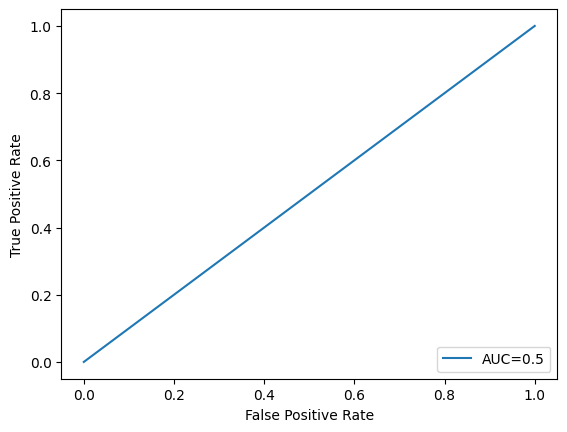

In [108]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [124]:
df_logit1 = data_org[["income", "age", "workclass", "education"]]

In [125]:
one_hot_encode_workclass = pd.get_dummies(df_logit1["workclass"])
#one_hot_encode_workclass
one_hot_encode_edu1 = pd.get_dummies(df_logit1["education"])
#one_hot_encode_edu1

In [126]:
df_logit1["income"] = label_encoder.fit_transform(df_logit1["income"])


In [127]:
df_logit1 = df_logit1.drop(["workclass","education"], axis = 1)

In [130]:
df_logit1[one_hot_encode_edu1.columns] = one_hot_encode_edu1

In [132]:
df_logit1[one_hot_encode_workclass.columns] = one_hot_encode_workclass

In [135]:
df_logit1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   income            30162 non-null  int64
 1   age               30162 non-null  int64
 2   10th              30162 non-null  uint8
 3   11th              30162 non-null  uint8
 4   12th              30162 non-null  uint8
 5   1st-4th           30162 non-null  uint8
 6   5th-6th           30162 non-null  uint8
 7   7th-8th           30162 non-null  uint8
 8   9th               30162 non-null  uint8
 9   Assoc-acdm        30162 non-null  uint8
 10  Assoc-voc         30162 non-null  uint8
 11  Bachelors         30162 non-null  uint8
 12  Doctorate         30162 non-null  uint8
 13  HS-grad           30162 non-null  uint8
 14  Masters           30162 non-null  uint8
 15  Preschool         30162 non-null  uint8
 16  Prof-school       30162 non-null  uint8
 17  Some-college      30162 non-nul

In [139]:
X1 = df_logit1.iloc[:,1:]

In [141]:
Y1 = df_logit1["income"]

In [142]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,train_size=0.8,random_state=40)

In [143]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [144]:
predict_logit = logit_model.predict(x_test)

In [145]:
pred = pd.DataFrame()
pred["y_test"] = y_test
pred["y_pred"] = predict_logit
pred

,y_test,y_pred
26903,1,0
3565,0,0
4802,0,0
7645,1,0
21972,0,0
...,...,...
9852,1,0
8000,1,0
23513,0,0
18206,1,0


In [146]:
c1=confusion_matrix(y_test,predict_logit)
c1

array([[4277,  273],
       [1028,  455]])

In [147]:
accuracy_score(y_test,predict_logit)

0.7843527266699818

In [148]:
fpr, tpr, _ = roc_curve(y_test,  predict_logit)
auc = roc_auc_score(y_test, predict_logit)

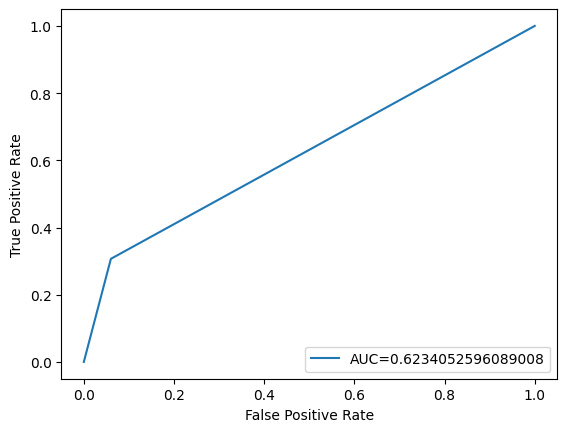

In [149]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree

In [151]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [152]:
data_org_decTree = data_org

In [153]:
data_org_decTree = data_org_decTree.drop(["marital-status", "race", "sex", "native-country", "relationship"], axis = 1)

In [154]:
data_org_decTree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   occupation      30162 non-null  object
 6   capital-gain    30162 non-null  int64 
 7   capital-loss    30162 non-null  int64 
 8   hours-per-week  30162 non-null  int64 
 9   income          30162 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.5+ MB


In [156]:
col_dt_obj = ["workclass", "education", "occupation", "income"]

In [157]:
for i in col_dt_obj:
  data_org_decTree[i] = label_encoder.fit_transform(data_org_decTree[i])

In [159]:
data_org_decTree.head()

,age,workclass,fnlwgt,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
0,39,5,77516,9,13,0,2174,0,40,0
1,50,4,83311,9,13,3,0,0,13,0
2,38,2,215646,11,9,5,0,0,40,0
3,53,2,234721,1,7,5,0,0,40,0
4,28,2,338409,9,13,9,0,0,40,0


In [160]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [161]:
X = data_org_decTree.iloc[:,0:-1]

In [163]:
Y = data_org_decTree["income"]

In [164]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(21113, 9)
(9049, 9)


In [165]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [166]:
accuracy_score(y_test,y_test_pred)

0.7669355729914907

In [167]:
c1=confusion_matrix(y_test,y_test_pred)
c1

array([[5688, 1076],
       [1033, 1252]])

### Ramdom Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(24129, 9)
(6033, 9)


In [176]:
randomForestClassifier = RandomForestClassifier(n_estimators=300)
randomForestClassifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [177]:
y_test_pred_RF = clf.predict(x_test)

In [178]:
accuracy_score(y_test,y_test_pred_RF)

0.7704293054864909

In [179]:
c1=confusion_matrix(y_test,y_test_pred_RF)
c1

array([[3819,  713],
       [ 672,  829]])